> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will conducting an analysis using the TMDB movie dataset and will aim to explore data analysis using this dataset.
This dataset from (IMDB) contains 10000 movies which includes user_rating and revenue.
I will be aiming to ask questions such as

1. What is the relationship between the vote average and profit
2. How are the vote_average distributed in our dataset
3. Can we predict  general revenue if we know the budget and the rating the movie recieved

In [1]:
#Loading all the neccessary libaries needed for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> data cleaning process and removal of unwanted columns

### General Properties

In [2]:
tmdb_data = pd.read_csv('tmdb_movies.csv', skipinitialspace=True)
#This print the first five roles of the datasets
tmdb_data.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#this will give info on the columns in the dataset
tmdb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> Obviously with the information i have so far, it safe to conclude that the data has irregulariies and but null and duplicated data.

> I will remove columns not relevant to my specific research questions and using a correlation matrix to see how columns relates to one another

### Data Cleaning Procedeurs

In [4]:
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking at this distribution, I have some revenues and budget with some 0's in data which wouldn't 
be needed in our research

In [5]:
# remove zeros columns from our budget and revenue columns 
#Will replace the zeros for nah
tmdb_data['revenue'] = tmdb_data['revenue'].replace(0, np.NaN)
tmdb_data['runtime'] = tmdb_data['runtime'].replace(0,np.NaN)
tmdb_data['budget'] = tmdb_data['budget'].replace(0,np.NaN)
# Check the stats of dataset
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#I will be dropping columns i feel arent going to be neccessary for my analysis
deleted = ['imdb_id','homepage','director','tagline','keywords','budget_adj', 'revenue_adj',
                          'production_companies']
tmdb_db = tmdb_data.drop(deleted,axis=1,)

In [7]:
tmdb_db.dropna(inplace=True)
tmdb_db.info()
#We have drop all rows that contains missing value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3851 non-null   int64  
 1   popularity      3851 non-null   float64
 2   budget          3851 non-null   float64
 3   revenue         3851 non-null   float64
 4   original_title  3851 non-null   object 
 5   cast            3851 non-null   object 
 6   overview        3851 non-null   object 
 7   runtime         3851 non-null   float64
 8   genres          3851 non-null   object 
 9   release_date    3851 non-null   object 
 10  vote_count      3851 non-null   int64  
 11  vote_average    3851 non-null   float64
 12  release_year    3851 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 421.2+ KB


In [8]:
tmdb_db.drop_duplicates()
tmdb_db.shape

(3851, 13)

In [9]:
tmdb_db.isnull().sum()

#We can now confirm we have no nulls in our data

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

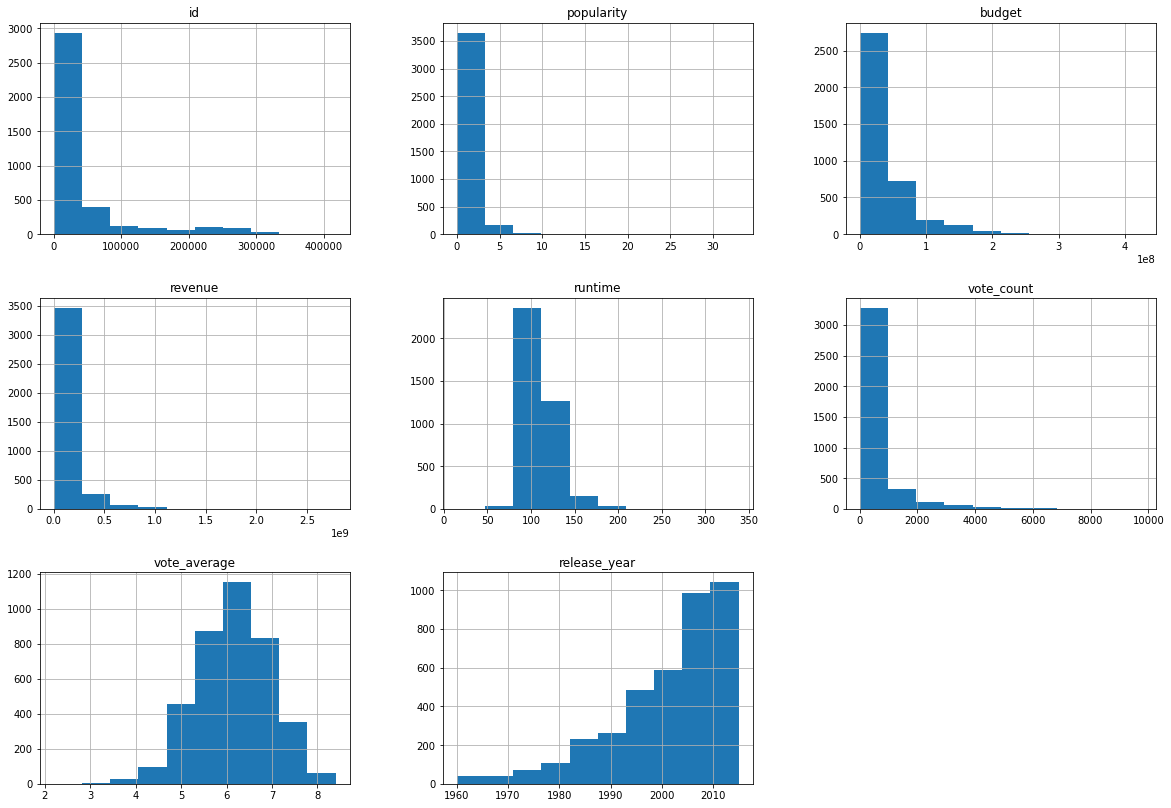

In [10]:
tmdb_db.hist(figsize=(20,14))

#this gives a general distribution of the data

In [11]:
#Since I want to look at both revenue and profit i would like to create the column profit
tmdb_db['profit'] = tmdb_db['revenue'] - tmdb_db['budget']
# Lets look at the new dataset
tmdb_db.head()

,id,popularity,budget,revenue,original_title,cast,overview,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.316249e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Now we have clean data, with removed nan and zeros, we can procede to explore the new data


Text(0.5, 1.0, 'Correlation Index')

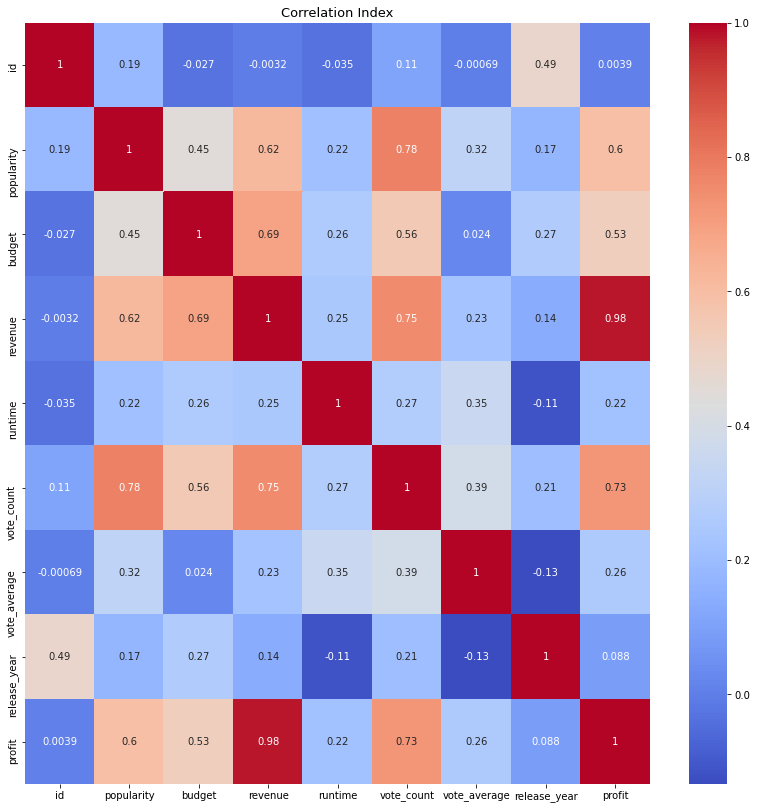

In [12]:
# correlation matrix
corr = tmdb_db.corr()

plt.figure(figsize=(14,14))
tig = sns.heatmap(corr, annot = True, cmap= 'coolwarm')

tig.set_title('Correlation Index',fontsize= 13)
#This shows the correlation index between columns relationship with each other
# This is scaled on 0-1 with 1 the highest and 0 the lowest

# What is the relationship between the vote average and profit

In [13]:
tmdb_db['vote_average'].mean()

6.168293949623477

> The average vote for a movie is 6.168.


In [14]:
#Movie with highest vote average
tmdb_db.loc[tmdb_db['vote_average'].idxmax()]

id                                                              278
popularity                                                 7.192039
budget                                                   25000000.0
revenue                                                  28341469.0
original_title                             The Shawshank Redemption
cast              Tim Robbins|Morgan Freeman|Bob Gunton|William ...
overview          Framed in the 1940s for the double murder of h...
runtime                                                       142.0
genres                                                  Drama|Crime
release_date                                                9/10/94
vote_count                                                     5754
vote_average                                                    8.4
release_year                                                   1994
profit                                                    3341469.0
Name: 4178, dtype: object

In [15]:
#Movie with lowest vote average
tmdb_db.loc[tmdb_db['vote_average'].idxmin()]

id                                                           116977
popularity                                                 0.111351
budget                                                   65000000.0
revenue                                                     73706.0
original_title                                           Foodfight!
cast              Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
overview          Dex, a superdog sleuth, is the law of the land...
runtime                                                        87.0
genres                               Animation|Action|Comedy|Family
release_date                                                6/15/12
vote_count                                                       12
vote_average                                                    2.2
release_year                                                   2012
profit                                                  -64926294.0
Name: 4859, dtype: object

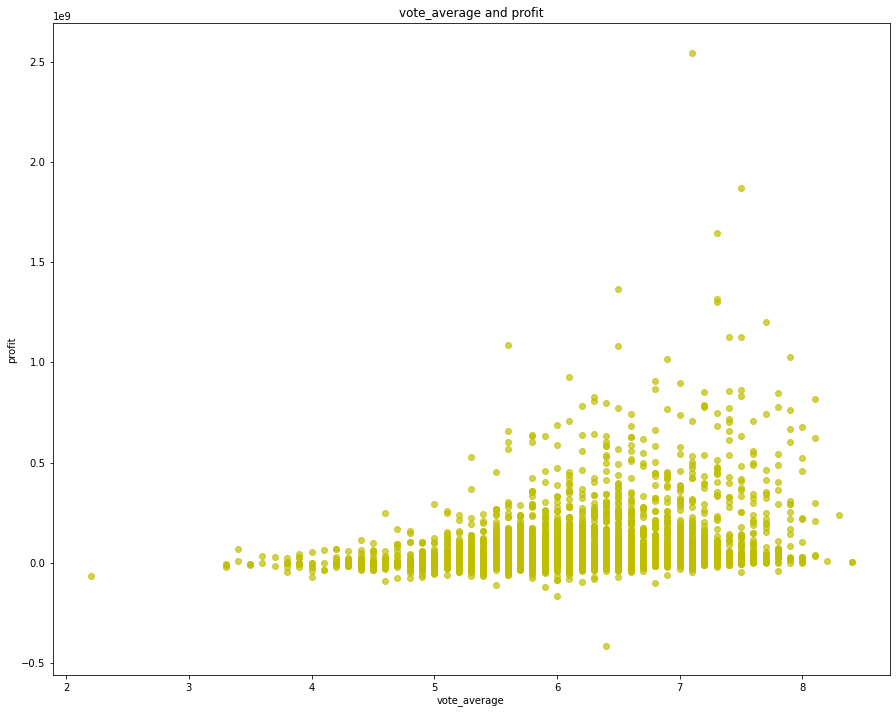

In [16]:
#Using a scatter plot
plt.subplots(figsize=(15, 12))
plt.xlabel('vote_average')
plt.ylabel('profit')
plt.title('vote_average and profit')
plt.scatter(tmdb_db['vote_average'], tmdb_db['profit'] , alpha=0.7, color='y')
plt.show()

> From this graph it can be said that movies with average vote of 5 tends to make good profit

# How are the vote_average distributed in our dataset


In [17]:
# Creating bins to cut column into 4 ratings
column = [0, 2.5, 5, 7.5, 10]

#Making bin labels
names = ['low_rating','mid_rating','top_rating', 'highest_rating']



In [18]:
# Creating a column to turn vote_average into ratings
tmdb_db['Ratings'] = pd.cut(tmdb_db['vote_average'], column, labels= names)

#A view of new dataset
tmdb_db.head(5)

,id,popularity,budget,revenue,original_title,cast,overview,runtime,genres,release_date,vote_count,vote_average,release_year,profit,Ratings
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.363529e+09,top_rating
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,2.284364e+08,top_rating
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.852382e+08,top_rating
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.868178e+09,top_rating
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.316249e+09,top_rating


In [19]:
tmdb_db['Ratings'].value_counts()

rating = tmdb_db['Ratings'].value_counts(ascending = True)

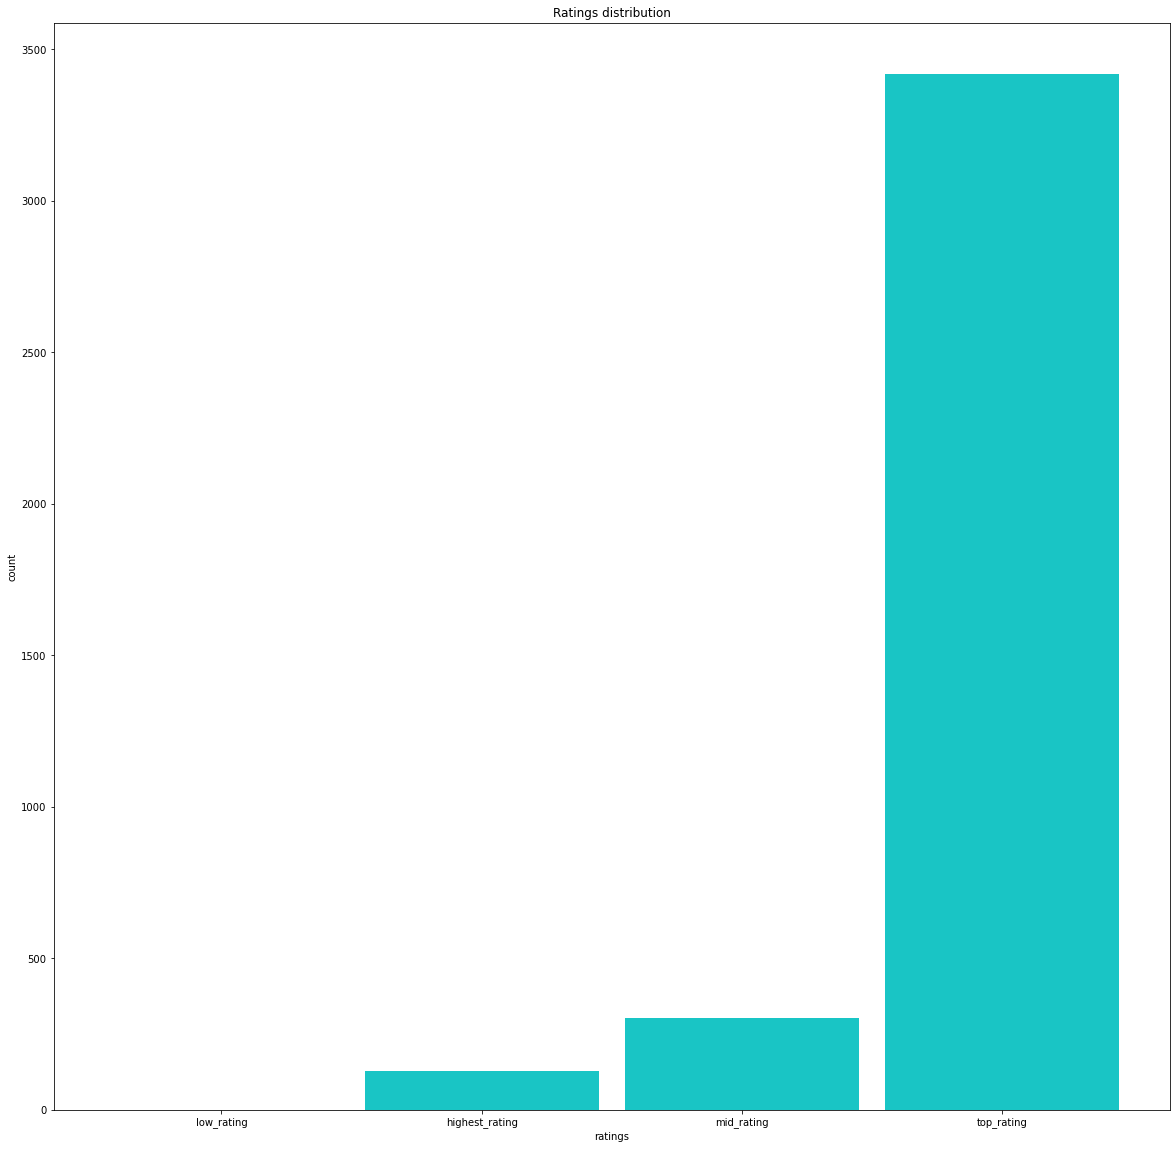

In [20]:
#making a bar chart of the movies
#Plotting a bar chart
plt.subplots(figsize=(20, 20))
Colors = ['c']
plt.bar( rating.index, rating, alpha=0.9, color=Colors,width=0.9)
plt.title('Ratings distribution')
plt.xlabel('ratings')
plt.ylabel('count');

> According to the chart most movie in our dataset falls in the top rating
which cooresponds to a vote_ratings between 5 and 7.5

# Can we predict  general revenue if we know the budget and the vote_average the movie recieved

In [21]:
# Loading LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

> Movie generally recieved vote after the movie is released.

> The linear Regression is going to use the best fit linear equation to estimate the revenue

In [22]:
#Making a copy of my tmdb data
tmdb_predict = tmdb_db.copy()

tmdb_predict.head()

,id,popularity,budget,revenue,original_title,cast,overview,runtime,genres,release_date,vote_count,vote_average,release_year,profit,Ratings
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.363529e+09,top_rating
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,2.284364e+08,top_rating
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.852382e+08,top_rating
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.868178e+09,top_rating
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.316249e+09,top_rating


In [23]:
tmdb_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              3851 non-null   int64   
 1   popularity      3851 non-null   float64 
 2   budget          3851 non-null   float64 
 3   revenue         3851 non-null   float64 
 4   original_title  3851 non-null   object  
 5   cast            3851 non-null   object  
 6   overview        3851 non-null   object  
 7   runtime         3851 non-null   float64 
 8   genres          3851 non-null   object  
 9   release_date    3851 non-null   object  
 10  vote_count      3851 non-null   int64   
 11  vote_average    3851 non-null   float64 
 12  release_year    3851 non-null   int64   
 13  profit          3851 non-null   float64 
 14  Ratings         3851 non-null   category
dtypes: category(1), float64(6), int64(3), object(5)
memory usage: 584.3+ KB


In [24]:
# Declaring independent and dependent variable
# Dependent
Y = tmdb_predict['revenue']
X = tmdb_predict[['budget', 'vote_average']]


In [25]:
X

,budget,vote_average
0,150000000.0,6.5
1,150000000.0,7.1
2,110000000.0,6.3
3,200000000.0,7.5
4,190000000.0,7.3
...,...,...
10822,7500000.0,7.5
10828,3000000.0,6.3
10829,4653000.0,6.9
10835,12000000.0,7.0


In [27]:
X.describe()

,budget,vote_average
count,3.851000e+03,3851.000000
mean,3.723839e+07,6.168294
std,4.220955e+07,0.794736
min,1.000000e+00,2.200000
25%,1.000000e+07,5.700000
50%,2.400000e+07,6.200000
75%,5.000000e+07,6.700000
max,4.250000e+08,8.400000


In [29]:
X.shape 

(3851, 2)

In [30]:
Y.shape

(3851,)

# The linear regression

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(X, Y)

LinearRegression()

# The R-score for the model

In [33]:
reg.score(X, Y)

0.5184331871531033

# The adjusted R-score for the model

In [34]:
def adj_r2(X,Y):
    r2 = reg.score(X,Y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adj_r2(X, Y)

0.5181828925518315

> R_squared isn't significantly larger than the adjusted r-squared implying we were not punished alot for using to indepent variable

# Finding the Coefficent of the model

In [73]:
reg.coef_

array([2.85907717e+00, 4.68880203e+07])

# Finding the intercept

In [74]:
reg.intercept_

-287924598.43587184

> The linear equation for the model is (2.85907717 * budget) + (46888020.3 * vote_average) - 
287924598.43

In [41]:
def budget_vote_model(x, y):
    new_data = pd.DataFrame({'budget': [x], 'vote_average': [y]})
    prediction = reg.predict([[x, y]])
    predictiondf = pd.DataFrame({'predictions': prediction})
    complete_df = new_data.join(predictiondf)
    
    return complete_df

In [46]:
budget_vote_model(50000000, 8)

,budget,vote_average,predictions
0,50000000,8,2.301334e+08


> a movie with a budget of 50,000,000 and vote average of 8 is estimated to have a revenue of 230 million dollars.

# Takeaways

> This model prediction isn't an 100% accurate as the dataset itself contains some outliers


<a id='conclusions'></a>
## Conclusions

> The dataset contains alot of limitations due the fact that I prioritized quality data over quantity
thus losing a large chunk of my data.

> The data provided by the dataset isn't accurate in terms revenue and profit as some movies continue to accumulate profit over the years. An example is the movie the highest vote_average " The Shawshank Redemption" made in 1994 the dataset revenue is just about 28 million while the actuall revenue till date is just over 56 million.

> Dropping columns and Null from ("turning some of my columns zeros' into NAN, *budget, runtime, revenue) surely  affected the accuracy of dataset. An example will be the years column. Now i think about it movies in the 20th century tends to sell more theater customers than the 19th thereby generating more revenues. it could be as convenient as using the vote_average as an independent variable.  